<a href="https://colab.research.google.com/github/davifebdn/visualitzacio_exploratoria/blob/main/Data_Science_Sprint_3_T01_Visualitzaci%C3%B3_gr%C3%A0fica_d'un_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# S03 T01: Visualització gràfica d'un dataset
Complementa les tècniques d'exploració de les dades mitjantçant la visualització gràfica, amb les llibreries Matplotlib i Searborn. 

## Nivell 1

### Exercici 1

Resumeix gràficament el data set DelayedFlights.csv

Crea almenys una visualització per:

*    Una variable categòrica (UniqueCarrier)
*    Una variable numèrica (ArrDelay)
*    Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
*    Dues variables numèriques (ArrDelay i DepDelay)
*    Tres variables (ArrDelay, DepDelay i UniqueCarrier)
*    Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).





In [3]:
#Importació del document que vaig fer al S2 T05
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/file/d/1EyE8slhQeOY7eE36xT72verJxZrmVQNd/view?usp=sharing'

id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('AirlinesDelayDavid.csv')

df = pd.read_csv('AirlinesDelayDavid.csv')
df.head()

,Unnamed: 0,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,...,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date,MeanVelocity,Late
0,0,4,2003.0,1955,2211.0,2225,WN,128.0,150.0,116.0,...,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03,376.019135,False
1,1,4,754.0,735,1002.0,1000,WN,128.0,145.0,113.0,...,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03,315.370887,True
2,2,4,628.0,620,804.0,750,WN,96.0,90.0,76.0,...,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03,282.541875,True
3,3,4,1829.0,1755,1959.0,1925,WN,90.0,90.0,77.0,...,N,0,2.0,0.0,0.0,0.0,32.0,2008-01-03,382.518231,True
4,4,4,1940.0,1915,2121.0,2110,WN,101.0,115.0,87.0,...,N,0,NaN,NaN,NaN,NaN,NaN,2008-01-03,367.027094,True


In [4]:
#Import

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

####Variable categòrica

Per la variable categòrica de `UniqueCarrier` he volgut fer un gràfic de barres, i que quedés endreçat de major a menor número de vols.

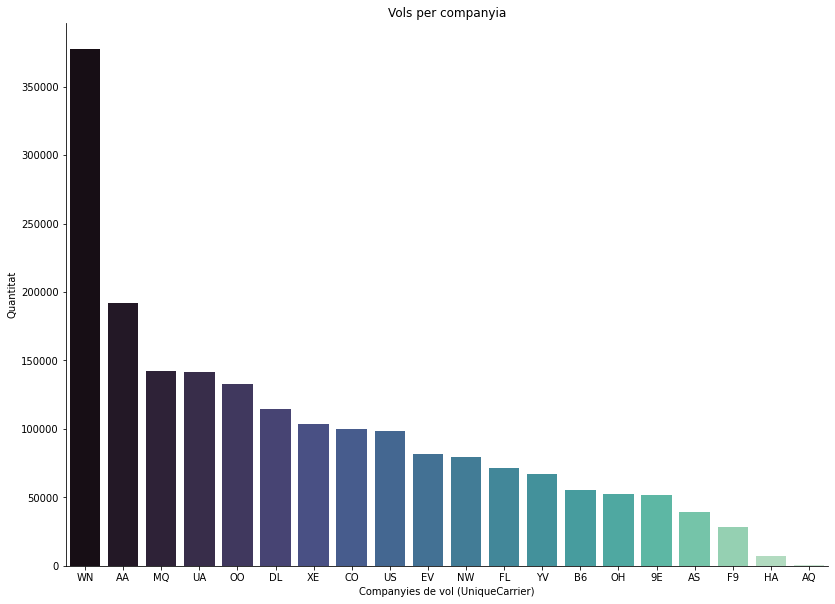

In [5]:
#Una variable categòrica (UniqueCarrier)

uCarrier = sns.catplot(x="UniqueCarrier", kind="count", palette="mako", data=df, order=df['UniqueCarrier'].value_counts().index, height=8.27, aspect=11.7/8.27)
uCarrier.set_axis_labels("Companyies de vol (UniqueCarrier)", "Quantitat")
plt.title("Vols per companyia")
plt.show()

Mirant la gràfica, podem veure que la companyia WN destaca de la resta amb més de 350.000 vols en total, seguit de la companyia AA amb gairebé 200.000, i, per últim, la companyia AQ amb tants pocs vols que no es pot veure visualment la barra AQ.

Podem fer un segon exemple compost amb els aeroports amb més sortides i aterratges

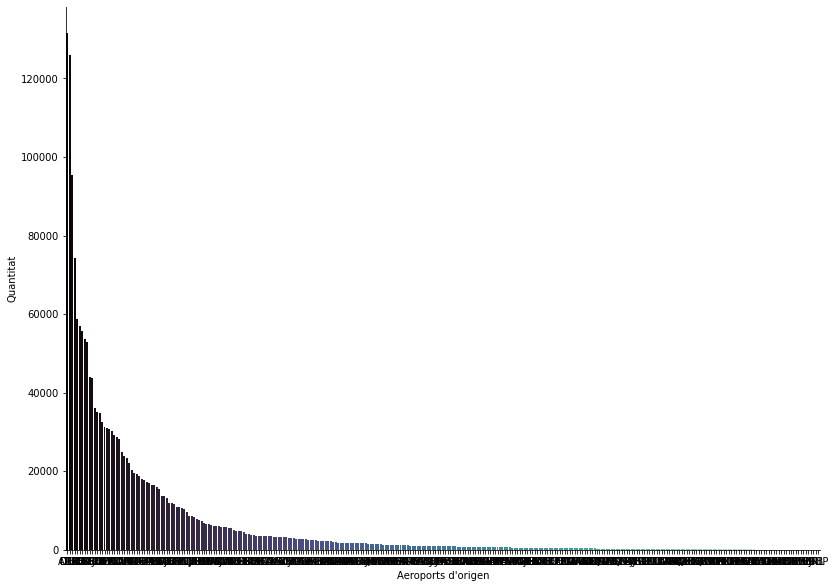

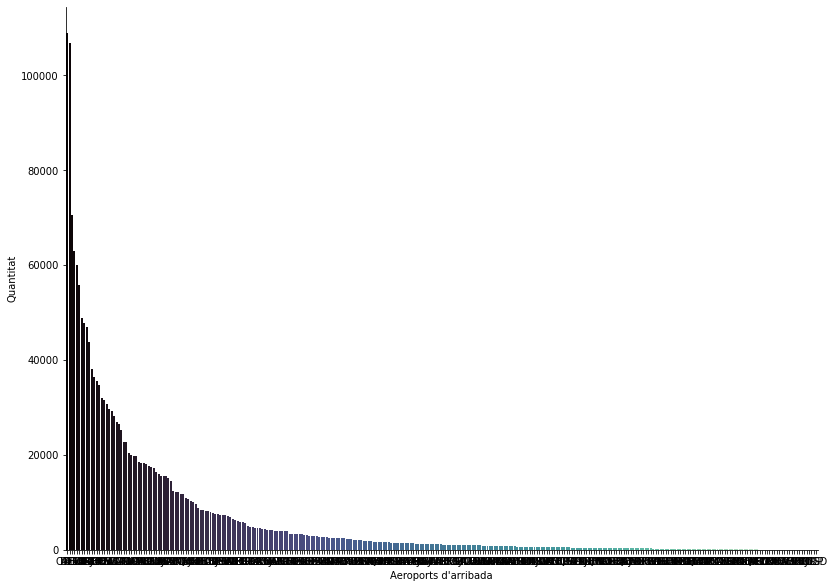

In [6]:
aeroports1 = sns.catplot(x="Origin", kind="count", palette="mako", data=df, order=df['Origin'].value_counts().index, height=8.27, aspect=11.7/8.27)
plt.xlabel("Aeroports d'origen")
plt.ylabel("Quantitat")
aeroports2 = sns.catplot(x="Dest", kind="count", palette="mako", data=df, order=df['Dest'].value_counts().index, height=8.27, aspect=11.7/8.27)
plt.xlabel("Aeroports d'arribada")
plt.ylabel("Quantitat")

plt.show()

####Variable numèrica

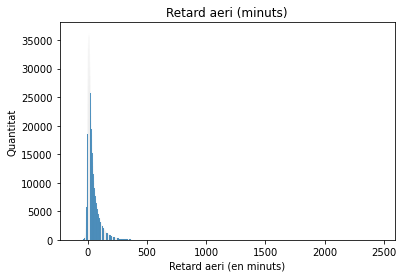

In [7]:
retard = sns.histplot(data=df, x="ArrDelay", pthresh=500)
plt.title("Retard aeri (minuts)")
plt.xlabel("Retard aeri (en minuts)")
plt.ylabel("Quantitat")
plt.show()

####Variable numèrica i variable categòrica

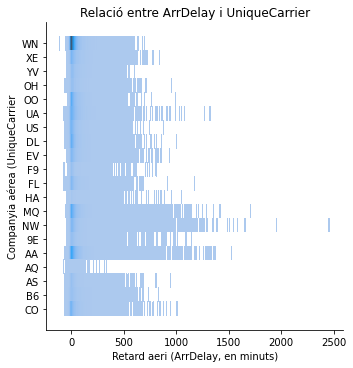

In [21]:
#ArrDelay i UniqueCarrier

#Plot the histogram thanks to the distplot function
sns.displot(x=df['ArrDelay'], y=df["UniqueCarrier"])
plt.title("Relació entre ArrDelay i UniqueCarrier")
plt.xlabel("Retard aeri (ArrDelay, en minuts)")
plt.ylabel("Companyia aérea (UniqueCarrier")
plt.show()

